# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [27]:
import pandas as pd
import numpy as np
from scipy import stats

In [28]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [29]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [30]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [31]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [33]:
data.race.value_counts()

b    2435
w    2435
Name: race, dtype: int64

### In the variable 'race_code' code race as follows:
* if race is 'b', True
* otherwise False

In [34]:
data['race_code'] = (data['race'] == 'b')

In [35]:
data['race_code'].head()

0    False
1    False
2     True
3     True
4    False
Name: race_code, dtype: bool

## 1. For this problem we will use Pearson correlation between the race and the call variables. CLT applies as we have a sample higher than 30.

## 2. 

## Null hypothesis: having a black-sounding name does not have a significant impact on the rate of callbacks for resumes.

## Alternate hypothesis: having a black-sounding name has a significant impact on the rate of callbacks for resumes.

## 3. Let's start with p-value. 
## Assuming the null hypothesis, let's see what is the likelihood of getting results as extreme as in our sample.

In [36]:
np.random.seed(134)

In [37]:
# Observed Pearson correlation in our sample
def pearsonr(x,y):
    return stats.pearsonr(x,y)[0]
r_obs = pearsonr(data.race_code, data.call)
r_obs

-0.05887209917662773

In [38]:
race_code = np.array(data.race_code)
calls = np.array(data.call)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute race codes: race_code_permuted
    race_code_permuted = np.random.permutation(race_code)

    # Compute Pearson correlation
    perm_replicates[i] = pearsonr(race_code_permuted, calls)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


## 95% confidence interval for the replicates

In [39]:
conf_interval = np.percentile(perm_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_interval)

95% confidence interval = [-0.02868128  0.02868128]


## Margin of error for the computed Pearson correlations for replicates

In [40]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

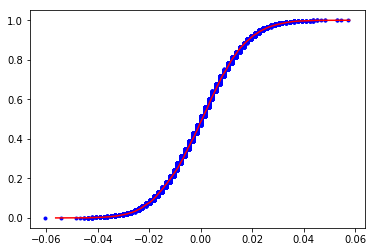

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 

x, y = ecdf(perm_replicates)
x_norm, y_norm = ecdf(np.random.normal(perm_replicates.mean(), perm_replicates.std(), 10000))
plt.plot(x,y, marker = '.', linestyle = 'none', color = 'blue')
plt.plot(x_norm, y_norm, color = 'red')
plt.show()

## Based on analysis above, our replicates are indeed normally distributed. Let's compute the margin of error.

In [42]:
margin_of_error = 1.96 * stats.sem(perm_replicates)
print('margin of error = ', margin_of_error)

margin of error =  0.000280897096233


## 4. Correlation between having a black-sounding name and getting a callback definitely exists, and it's a small negative correlation.

## 5. This analysis does not necessarily mean that having a black-sounding name is the most important factor in callback success. Other factors that may have a bigger impact are variables related to employment history, education, skills, gender, etc. 

## To test for such correlations I would: 
* Figure out what variable names and values mean (I tried to find a data dictionary for this data set online, but did not succeed). Some of the variable names are cryptic, like 'ownership' or 'bankreal'.
* Once I understand what variables and their values mean, I would construct a Pearson correlation matrix to see which variables are correlated most with the callback success. I could also use a feature selection algorithm to select features that are the most correlated with callback success.